# Model Structure

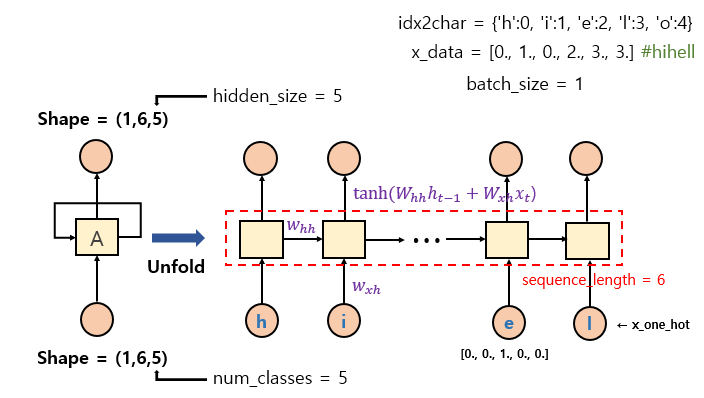

In [11]:
from IPython.display import Image
Image('D:/jupyter/hihello_RNN_fromTensorflow.png')

# Data Creation

In [1]:
from tensorflow import keras

# Data creation
idx2char = ['h','i','e','l','o'] # h=0, i=1, e=2, l=3, o=4
x_data = [[0,1,0,2,3,3]] # hihell
y_data = [[1,0,2,3,3,4]] # ihello
x_one_hot = keras.utils.to_categorical(x_data, 5)
x_one_hot

array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]]], dtype=float32)

# RNN model generation

In [2]:
# 1 step : parameters setting
hidden_size = 5
num_classes = 5
batch_size = 1
sequence_length = 6 # (|hihello| = 7) - 1

In [3]:
# 2 step : palceholder generation
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, sequence_length, num_classes]) # x one-hot 
# None : batch size를 딱 정하지 않음   
y = tf.placeholder(tf.int32, [None, sequence_length]) # y label

In [4]:
# 3 step : cell generation
#cell = rnn_cell.BasicRNNCell(rnn_size) 
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True) 
#cell = rnn_cell.BasicGRUCell(rnn_size) 
initial_state = cell.zero_state(batch_size, tf.float32)

# 4 step : dynamic function generation
outputs, _states = tf.nn.dynamic_rnn(cell, x, initial_state=initial_state, dtype=tf.float32)
weights = tf.ones([batch_size, sequence_length])

W1008 15:44:58.327431 32048 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1008 15:44:58.331455 32048 deprecation.py:323] From <ipython-input-4-3cd471c07736>:3: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1008 15:44:58.407245 32048 deprecation.py:323] From <ipython-input-4-3cd471c07736>:8: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, 

# Cost model setting

In [6]:
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# Training

In [7]:
import numpy as np

prediction = tf.argmax(outputs, axis=2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(2000):
    l, _ = sess.run([loss, train], feed_dict={x: x_one_hot, y:y_data})
    result = sess.run(prediction, feed_dict={x: x_one_hot})
    if i % 200 == 0:
        print(i, "loss:",l, "\n   prediction:",result, '\n   true y:', y_data)
    
        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("   Prediction str: ", ''.join(result_str))

0 loss: 1.5806737 
   prediction: [[3 3 3 3 3 3]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  llllll
200 loss: 0.62146384 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
400 loss: 0.5924681 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
600 loss: 0.5898751 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
800 loss: 0.58838964 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
1000 loss: 0.58737165 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
1200 loss: 0.5866076 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
1400 loss: 0.5859998 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction str:  ihello
1600 loss: 0.58549684 
   prediction: [[1 0 2 3 3 4]] 
   true y: [[1, 0, 2, 3, 3, 4]]
   Prediction